# Pair Programming 27/05 Regresión lineal múltiple I - Tatiana y Guada

In [1]:
# Importando módulos y cargando el dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("/mnt/c/Users/USUARIO/Desktop/Adalab/DA-promo-A-module-3-pairprog-1-pair-2-Tatiana_Guada/Regresion/Regresion_1/salary.csv")
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Ejercicio 1
Toma únicamente las variables de tipo numérico del dataset.
Realiza un EDA explicando algunas de las cosas interesantes del conjunto de datos

In [ ]:
df_numeric = df.select_dtypes(include = ["float64","int64"])
df_numeric

In [ ]:
df_numeric.shape()

In [5]:
df_numeric.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education-num   32561 non-null  int64
 3   capital-gain    32561 non-null  int64
 4   capital-loss    32561 non-null  int64
 5   hours-per-week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [9]:
df_numeric.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

Obten la matriz de correlacion de las variables y estudia los resultados explicando las diferentes correlaciones con las variables.

<AxesSubplot:>

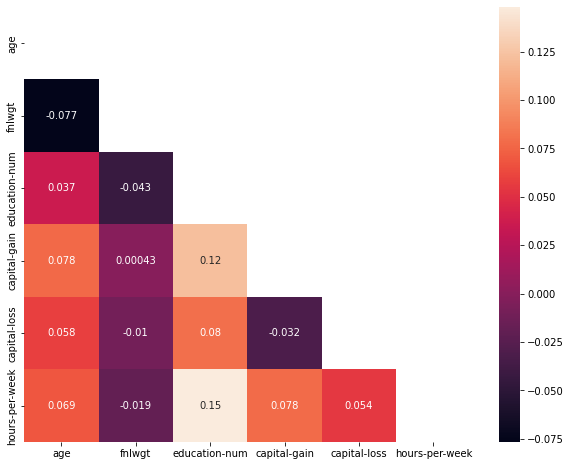

In [10]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

    Las correlaciones más altas son entre las variables son: educación num con Hours per week. 
    Seguido de , Educaction num con Capital gain 
    Education num con capital loss. Todas las anteriores son relaciones positivas. 


Limpia los datos de trabajo en caso de que sea necesario.

    Los datos estan limpios

Realiza el ajuste lineal múltiple mostrando las métricas.

In [11]:
df_numeric.stb.missing()

,missing,total,percent
age,0,32561,0.0
fnlwgt,0,32561,0.0
education-num,0,32561,0.0
capital-gain,0,32561,0.0
capital-loss,0,32561,0.0
hours-per-week,0,32561,0.0


In [14]:
df_numeric.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [26]:
x =df_numeric.drop(columns=["capital-gain"])# variables independientes 
y = df_numeric["capital-gain"] # variable dependiente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresión lineal
LR = LinearRegression() # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.026443206994748336
El valor de r2 score adjusted es  0.026256286483073876
El MAE es 2056.1042900424345
EL RMSE es  7134.420417589582
Para el conjunto test:---------------
El valor de r2 score es  0.02431587485528297
El valor de r2 score adjusted es  0.02356615599471379
El MAE es 2160.250898068826
EL RMSE es  7875.020592847539


    Analizando los datos encontramos que:
    r2 nos da un valor aceptable lo que nos indica que tenmos un buen ajuste lineal
    r2 ajustado es muy similar al r2 por lo tanto no se demasiado penalizado por el número de regresores
    MAE y RMSE son elevado asi que tendremos que remediarlo. 
    Recordamos que, el MAE (Mean absolute error): Sirve para obtener una medida de la diferencia entre los valores predichos frete a los reales. Y nos indicará la precisión de la predicción obtenida. A menor MAE, mejor es capaz de ajustar los datos del modelo que hemos creado.
    RMSE (Root Mean Squared Error): Nos muestra la distancia promedio entre los valores predichos y los valores reales del dataset. A menor RMSE, mejor es capaz de ajustarse el modelo obtenido.




In [29]:
scaler = MinMaxScaler()
df_numeric_estandar = df_numeric.copy()
df_numeric_estandar[['age', 'fnlwgt', 'education-num', 'capital-loss','hours-per-week']] = scaler.fit_transform(df_numeric_estandar[['age', 'fnlwgt', 'education-num', 'capital-loss','hours-per-week']])

In [30]:
df_numeric.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [32]:
x= df_numeric_estandar.drop(columns = ['capital_gain'])#independientes
y = df_numeric_estandar['capital_gain']#dependientes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresiónn lineal
LR = LinearRegression( normalize=True) # nos aseguramos de que se normalizan los datos
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

KeyError: "['capital_gain'] not found in axis"

# Ejercicio 2
Toma ahora el dataset incluyendo las variables categóricas.
Realiza el EDA de las variables categóricas que se va a incluir en el modelo.

In [ ]:
df_categoric

Utiliza algun tipo de codificación para las variables numéricas.

Realiza la misma limpieza de datos, en caso necesario, aplicada en el dataset del apartado para dejar las variables numéricas limpias.

Obten el ajuste lineal múltiple incluyendo las variables categóricas

# Ejercicio 3
Compara las métricas obtenidas del ajuste con las varaibles númerícas y con el modelo que incluia las variables categóricas. Explica los resultados obtenidos, pensando en posibles explicaciones.